<a href="https://colab.research.google.com/github/Maruf346/AI-ML-with-python/blob/main/Solution_of_Lab_Final_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ==============================
# 📘 Machine Learning Lab Assignment
# ==============================

# ---
# Course: CSE 412 - Machine Learning Lab
# Task: Employee Performance and Salary Analysis
# ---

# ==============================
# Step 1: Manually Create Dataset
# ==============================
import pandas as pd

# Synthetic employee dataset
data = {
    "Employee_ID": range(1, 21),
    "Employee_Name": [
        "Alice","Bob","Charlie","David","Eva","Frank","Grace","Helen","Ian","Jack",
        "Karen","Leo","Mona","Nina","Oscar","Paul","Queen","Raj","Sophia","Tom"
    ],
    "Age": [25, 30, 45, 29, 35, 40, 28, 32, 50, 41,
            27, 33, 38, 42, 31, 36, 29, 48, 34, 39],
    "Salary": [50000, 60000, 90000, 55000, 72000, 85000, 58000, 64000, 120000, 95000,
               52000, 67000, 75000, 88000, 61000, 70000, 56000, 110000, 73000, 82000],
    "Years_at_Company": [2, 4, 15, 3, 8, 12, 5, 6, 20, 13,
                         2, 7, 9, 14, 4, 10, 3, 18, 6, 11],
    "Number_of_Projects": [3, 4, 8, 3, 6, 7, 4, 5, 10, 9,
                           3, 5, 6, 7, 4, 8, 3, 9, 5, 7],
    "Performance_Score": [78, 85, 92, 65, 80, 88, 70, 75, 95, 90,
                          60, 77, 83, 89, 72, 81, 66, 94, 79, 87],
    "Is_Manager": [0,0,1,0,0,1,0,0,1,1,
                   0,0,1,1,0,0,0,1,0,1],
    "Works_Remotely": [1,0,0,1,0,0,1,0,0,1,
                       1,0,0,1,0,0,1,0,0,1],
    "Department": ["HR","IT","Finance","HR","IT","Finance","HR","IT","Finance","IT",
                   "HR","Finance","IT","Finance","HR","IT","Finance","HR","IT","Finance"],
    "Education_Level": ["Bachelors","Masters","PhD","Bachelors","Masters","PhD","Bachelors","Masters","PhD","Masters",
                        "Bachelors","PhD","Masters","PhD","Bachelors","Masters","Bachelors","PhD","Masters","PhD"],
    "Location": ["NY","CA","TX","NY","CA","TX","NY","CA","TX","CA",
                 "NY","TX","CA","TX","NY","CA","NY","TX","CA","TX"],
    "Hire_Date": pd.date_range(start="2010-01-01", periods=20, freq="365D")
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv("synthetic_employee_data.csv", index=False)

print("✅ Dataset created and saved as synthetic_employee_data.csv")
print(df.head())

# ==============================
# Step 2: Import Libraries
# ==============================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ==============================
# Step 3: Load Dataset
# ==============================
df = pd.read_csv("synthetic_employee_data.csv")
print("Dataset Shape:", df.shape)
df.head()

# ==============================
# Step 4: Data Preparation
# ==============================

# Drop irrelevant columns
df = df.drop(columns=["Employee_ID", "Employee_Name", "Hire_Date"])

# Handle missing values
num_cols = df.select_dtypes(include=["int64","float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Encode categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("After preprocessing shape:", df.shape)
df.head()

# ==========================================================
# 1️⃣ Linear Regression (Salary Prediction)
# ==========================================================

X = df.drop(columns=["Salary", "Performance_Score"])
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📌 Linear Regression (Salary Prediction)")
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# ==========================================================
# 2️⃣ Naïve Bayes (Performance Classification)
# ==========================================================

def categorize_performance(score):
    if score >= 80:
        return "High"
    elif score < 50:
        return "Low"
    else:
        return "Medium"

df["Performance_Class"] = df["Performance_Score"].apply(categorize_performance)

X = df.drop(columns=["Performance_Score", "Performance_Class", "Salary"])
y = df["Performance_Class"]

label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("\n📌 Naive Bayes Classification (Performance)")
print(classification_report(y_test, y_pred, target_names=label_enc.classes_))


✅ Dataset created and saved as synthetic_employee_data.csv
   Employee_ID Employee_Name  Age  Salary  Years_at_Company  \
0            1         Alice   25   50000                 2   
1            2           Bob   30   60000                 4   
2            3       Charlie   45   90000                15   
3            4         David   29   55000                 3   
4            5           Eva   35   72000                 8   

   Number_of_Projects  Performance_Score  Is_Manager  Works_Remotely  \
0                   3                 78           0               1   
1                   4                 85           0               0   
2                   8                 92           1               0   
3                   3                 65           0               1   
4                   6                 80           0               0   

  Department Education_Level Location  Hire_Date  
0         HR       Bachelors       NY 2010-01-01  
1         IT         Master

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (4, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(4, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (4, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(4, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)



📌 Neural Network (Performance Classification)
Accuracy: 1.0


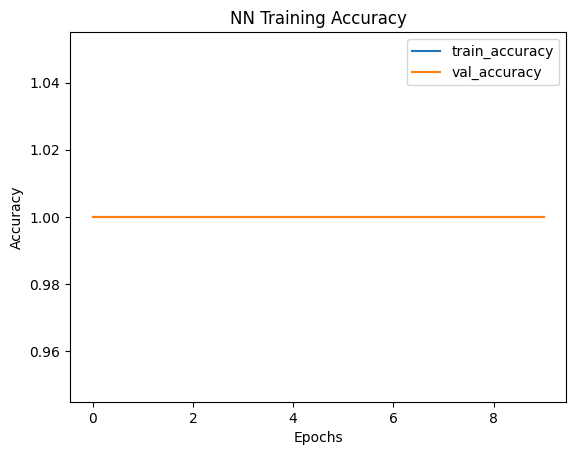

'\n✔ Linear Regression:\n- Predicts Salary using features.\n- MAE and R² measure accuracy.\n\n✔ Naïve Bayes:\n- Simple & interpretable.\n- Assumes independence of features.\n- Decent for quick classification.\n\n✔ Neural Network:\n- Learns complex patterns.\n- Generally higher accuracy.\n- Requires more compute & data.\n\n📊 Naïve Bayes = simple baseline\n📊 Neural Network = better predictive power\n'

In [6]:
# ==========================================================
# 3️⃣ Neural Networks (Performance Classification)
# ==========================================================

# Use the y_encoded from the Naive Bayes section
# y_nn = tf.keras.utils.to_categorical(y_encoded) # This line is not needed if y_encoded is already one-hot encoded

X = df.drop(columns=["Performance_Score", "Performance_Class", "Salary"])
# Re-encode the target variable to ensure it is one-hot encoded for the neural network
y_encoded = label_enc.fit_transform(df["Performance_Class"])
y_nn = tf.keras.utils.to_categorical(y_encoded)


X_train, X_test, y_train, y_test = train_test_split(X, y_nn, test_size=0.2, random_state=42)

nn_model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(y_nn.shape[1], activation="softmax") # Set the output layer size to match the number of classes
])

nn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=4, verbose=1)

loss, acc = nn_model.evaluate(X_test, y_test, verbose=0)
print("\n📌 Neural Network (Performance Classification)")
print("Accuracy:", acc)

plt.plot(history.history["accuracy"], label="train_accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("NN Training Accuracy")
plt.legend()
plt.show()

# ==========================================================
# 📌 Discussion
# ==========================================================
"""
✔ Linear Regression:
- Predicts Salary using features.
- MAE and R² measure accuracy.

✔ Naïve Bayes:
- Simple & interpretable.
- Assumes independence of features.
- Decent for quick classification.

✔ Neural Network:
- Learns complex patterns.
- Generally higher accuracy.
- Requires more compute & data.

📊 Naïve Bayes = simple baseline
📊 Neural Network = better predictive power
"""